In [1]:
import os
import glob
import numpy as np
from matplotlib import pyplot as plt
from osgeo import gdal
import pandas as pd
from keras.utils import to_categorical
import tensorflow as tf
from sklearn.utils import class_weight
import random

In [2]:
train_images = []
image_names = glob.glob(r"G:\Mi unidad\CG_Tesis_UrielMendoza\metodologia\datos\satelitales\Wildfire Burn Severity Assessment\Training\Image\Post/*.tif")
image_names.sort()
for img_path in image_names:
      # print(img_path)
      tiff_image = gdal.Open(img_path, 0)
      band7 = tiff_image.GetRasterBand(7).ReadAsArray()
      band8 = tiff_image.GetRasterBand(8).ReadAsArray()
      band9 = tiff_image.GetRasterBand(9).ReadAsArray()

      X = np.stack((band9, band8, band7), axis=-1)
      train_images.append(X)

train_images = np.array(train_images)
print(np.mean(train_images))
X_train = train_images
print(X_train.shape)

train_masks = []
image_names = glob.glob(r"G:\Mi unidad\CG_Tesis_UrielMendoza\metodologia\datos\satelitales\Wildfire Burn Severity Assessment\Training\Mask/*.tif")
image_names.sort()
for img_path in image_names:
  #  print(img_path)
   tiff_image = gdal.Open(img_path, 0)
   band1 = tiff_image.GetRasterBand(1).ReadAsArray()
   train_masks.append(band1)

train_masks = np.array(train_masks)
y_train = train_masks
print(y_train.shape)

y_train_cat = to_categorical(train_masks, num_classes=4)
y_train_cat = y_train_cat.astype(int)
print(y_train_cat.shape)

c:\Users\urielm\anaconda3\envs\Wildfire-Burn-Severity-Assessment\lib\site-packages\osgeo\gdal.py:311: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


1283.7584615587612
(690, 256, 256, 3)
(690, 256, 256)
(690, 256, 256, 4)


In [3]:
train_images_pre = []
image_names = glob.glob(r"G:\Mi unidad\CG_Tesis_UrielMendoza\metodologia\datos\satelitales\Wildfire Burn Severity Assessment\Training\Image\Pre/*.tif")
image_names.sort()
for img_path in image_names:
      # print(img_path)
      tiff_image = gdal.Open(img_path, 0)
      band7 = tiff_image.GetRasterBand(7).ReadAsArray()
      band8 = tiff_image.GetRasterBand(8).ReadAsArray()
      band9 = tiff_image.GetRasterBand(9).ReadAsArray()

      X = np.stack((band9, band8, band7), axis=-1)
      train_images_pre.append(X)

train_images_pre = np.array(train_images_pre)
print(np.mean(train_images_pre))

1283.7590900587


In [4]:
train_images_nbr = []
image_names = glob.glob(r"G:\Mi unidad\CG_Tesis_UrielMendoza\metodologia\datos\satelitales\Wildfire Burn Severity Assessment\Training\NBR/*.tif")
image_names.sort()
for img_path in image_names:
      # print(img_path)
      tiff_image = gdal.Open(img_path, 0)
      band1 = tiff_image.GetRasterBand(1).ReadAsArray()
      band2 = tiff_image.GetRasterBand(2).ReadAsArray()
      band3 = tiff_image.GetRasterBand(3).ReadAsArray()

      X = np.stack((band1, band2, band3), axis=-1)
      train_images_nbr.append(X)

train_images_nbr = np.array(train_images_nbr)
train_images_nbr = np.nan_to_num(train_images_nbr, nan=0.0)
print(np.mean(train_images_nbr))

3.1838393


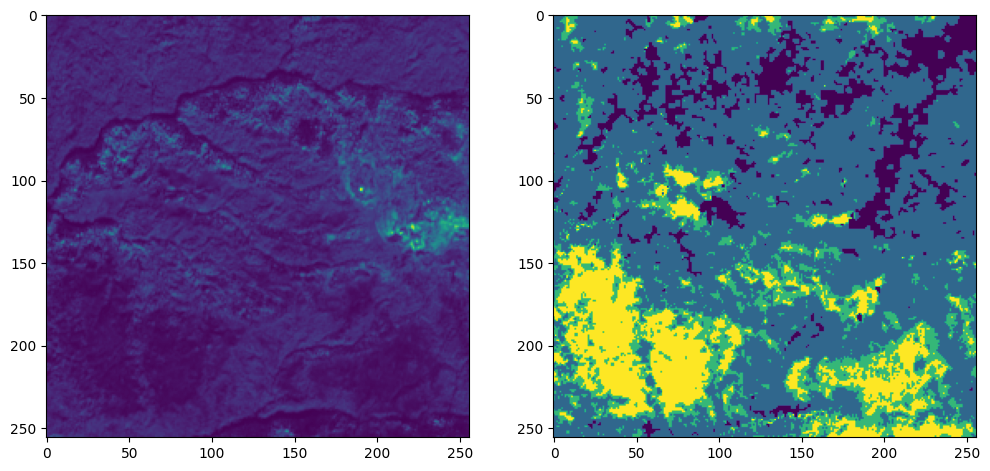

311


In [8]:
#Sanity check, view few images
import random
import numpy as np
image_number = random.randint(0, len(train_images)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape((train_images[image_number, :, :, 2]), (256, 256, 1)))
plt.subplot(122)
plt.imshow(np.reshape(train_masks[image_number], (256, 256, 1)))
plt.show()
print(image_number)

In [9]:
test_images = []
image_names = glob.glob(r"G:\Mi unidad\CG_Tesis_UrielMendoza\metodologia\datos\satelitales\Wildfire Burn Severity Assessment\Testing\Image\Post/*.tif")
image_names.sort()
for img_path in image_names:
      # print(img_path)
      tiff_image = gdal.Open(img_path, 0)
      band7 = tiff_image.GetRasterBand(7).ReadAsArray()
      band8 = tiff_image.GetRasterBand(8).ReadAsArray()
      band9 = tiff_image.GetRasterBand(9).ReadAsArray()

      X = np.stack((band9, band8, band7), axis=-1)
      test_images.append(X)

test_images = np.array(test_images)
print(np.mean(test_images))
print(test_images.shape)

test_masks = []
image_names = glob.glob(r"G:\Mi unidad\CG_Tesis_UrielMendoza\metodologia\datos\satelitales\Wildfire Burn Severity Assessment\Testing\Mask/*.tif")
image_names.sort()
for img_path in image_names:
   tiff_image = gdal.Open(img_path, 0)
   band1 = tiff_image.GetRasterBand(1).ReadAsArray()
   test_masks.append(band1)

test_masks = np.array(test_masks)
print(np.unique(test_masks))

y_test_cat = to_categorical(test_masks, num_classes=4)
y_test_cat = y_test_cat.astype(int)
print(y_test_cat.shape)
print(np.unique(y_test_cat))

1314.3571367617008
(36, 256, 256, 3)
[0 1 2 3]
(36, 256, 256, 4)
[0 1]


In [10]:
test_images_pre = []
image_names = glob.glob(r"G:\Mi unidad\CG_Tesis_UrielMendoza\metodologia\datos\satelitales\Wildfire Burn Severity Assessment\Testing\Image\Pre/*.tif")
image_names.sort()
for img_path in image_names:
      # print(img_path)
      tiff_image = gdal.Open(img_path, 0)
      band7 = tiff_image.GetRasterBand(7).ReadAsArray()
      band8 = tiff_image.GetRasterBand(8).ReadAsArray()
      band9 = tiff_image.GetRasterBand(9).ReadAsArray()

      X = np.stack((band9, band8, band7), axis=-1)
      test_images_pre.append(X)

test_images_pre = np.array(test_images_pre)
print(np.mean(test_images_pre))
print(test_images_pre.shape)

1314.3589101720738
(36, 256, 256, 3)


In [11]:
test_images_nbr = []
image_names = glob.glob(r"G:\Mi unidad\CG_Tesis_UrielMendoza\metodologia\datos\satelitales\Wildfire Burn Severity Assessment\Testing\NBR/*.tif")
image_names.sort()
for img_path in image_names:
      # print(img_path)
      tiff_image = gdal.Open(img_path, 0)
      band1 = tiff_image.GetRasterBand(1).ReadAsArray()
      band2 = tiff_image.GetRasterBand(2).ReadAsArray()
      band3 = tiff_image.GetRasterBand(3).ReadAsArray()

      X = np.stack((band1, band2, band3), axis=-1)
      test_images_nbr.append(X)

test_images_nbr = np.array(test_images_nbr)
print(np.mean(test_images_nbr))

3.0964825


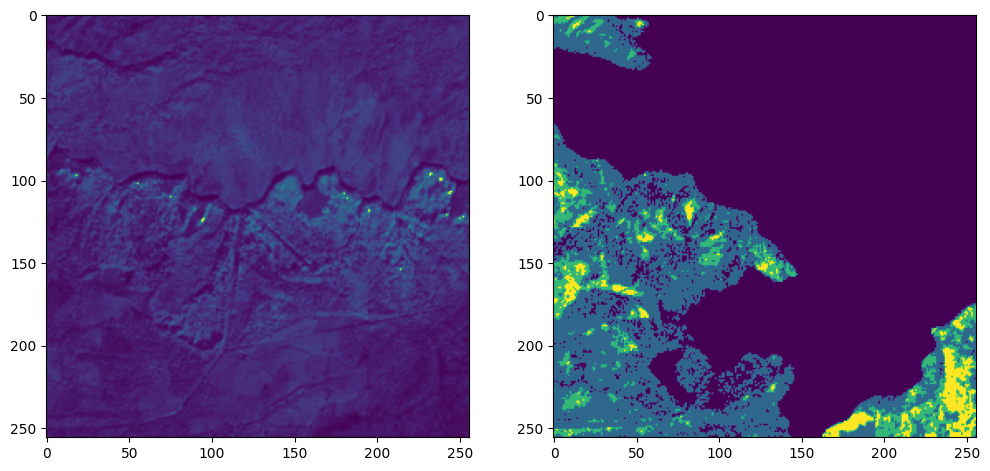

22


In [13]:
# #Sanity check, view few images
image_number = random.randint(0, len(test_images)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape((test_images[image_number, :, :, 2]), (256, 256, 1)))
plt.subplot(122)
plt.imshow(np.reshape(test_masks[image_number], (256, 256, 1)))
plt.show()
print(image_number)

In [14]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Activation, multiply
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras import backend as K

def conv_block(x, filter_size, size, dropout, batch_norm=False):

    conv = layers.Conv2D(size, (filter_size, filter_size), padding="same")(x)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation("relu")(conv)

    conv = layers.Conv2D(size, (filter_size, filter_size), padding="same")(conv)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation("relu")(conv)

    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)

    return conv


def repeat_elem(tensor, rep):

     return layers.Lambda(lambda x, repnum: K.repeat_elements(x, repnum, axis=3),
                          arguments={'repnum': rep})(tensor)

def gating_signal(input, out_size, batch_norm=False):

    x = layers.Conv2D(out_size, (1, 1), padding='same')(input)
    if batch_norm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def attention_block(x, gating, inter_shape):
    shape_x = K.int_shape(x)
    shape_g = K.int_shape(gating)

# Getting the x signal to the same shape as the gating signal
    theta_x = layers.Conv2D(inter_shape, (2, 2), strides=(2, 2), padding='same')(x)  # 16
    shape_theta_x = K.int_shape(theta_x)

# Getting the gating signal to the same number of filters as the inter_shape
    phi_g = layers.Conv2D(inter_shape, (1, 1), padding='same')(gating)
    upsample_g = layers.Conv2DTranspose(inter_shape, (3, 3),
                                 strides=(shape_theta_x[1] // shape_g[1], shape_theta_x[2] // shape_g[2]),
                                 padding='same')(phi_g)  # 16

    concat_xg = layers.add([upsample_g, theta_x])
    act_xg = layers.Activation('relu')(concat_xg)
    psi = layers.Conv2D(1, (1, 1), padding='same')(act_xg)
    sigmoid_xg = layers.Activation('sigmoid')(psi)
    shape_sigmoid = K.int_shape(sigmoid_xg)
    upsample_psi = layers.UpSampling2D(size=(shape_x[1] // shape_sigmoid[1], shape_x[2] // shape_sigmoid[2]))(sigmoid_xg)  # 32

    upsample_psi = repeat_elem(upsample_psi, shape_x[3])

    y = layers.multiply([upsample_psi, x])

    result = layers.Conv2D(shape_x[3], (1, 1), padding='same')(y)
    result_bn = layers.BatchNormalization()(result)
    return result_bn

def res_conv_block(x, filter_size, size, dropout, batch_norm=False):

    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(x)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation('relu')(conv)

    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(conv)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)

    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)

    shortcut = layers.Conv2D(size, kernel_size=(1, 1), padding='same')(x)
    if batch_norm is True:
        shortcut = layers.BatchNormalization(axis=3)(shortcut)

    res_path = layers.add([shortcut, conv])
    res_path = layers.Activation('relu')(res_path)  
    return res_path


In [15]:
def Attention_UNet(input_shape, NUM_CLASSES=4, dropout_rate=0.0, batch_norm=True):

    # network structure
    FILTER_NUM = 16 # number of basic filters for the first layer
    FILTER_SIZE = 3 # size of the convolutional filter
    UP_SAMP_SIZE = 2 # size of upsampling filters

    input1 = layers.Input(input_shape)

    # Downsampling layers post
    # DownRes 1, convolution + pooling
    conv_128_1 = conv_block(input1, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64_1 = layers.MaxPooling2D(pool_size=(2,2))(conv_128_1)
    # DownRes 2
    conv_64_1 = conv_block(pool_64_1, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    pool_32_1 = layers.MaxPooling2D(pool_size=(2,2))(conv_64_1)
    # DownRes 3
    conv_32_1 = conv_block(pool_32_1, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    pool_16_1 = layers.MaxPooling2D(pool_size=(2,2))(conv_32_1)
    # DownRes 4
    conv_16_1 = conv_block(pool_16_1, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_8_1 = layers.MaxPooling2D(pool_size=(2,2))(conv_16_1)
    # DownRes 5, convolution only
    conv_8_1 = conv_block(pool_8_1, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

    # Downsampling layers pre
    input2 = layers.Input(input_shape)
    # DownRes 1, convolution + pooling
    conv_128_2 = conv_block(input2, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64_2 = layers.MaxPooling2D(pool_size=(2,2))(conv_128_2)
    # DownRes 2
    conv_64_2 = conv_block(pool_64_2, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    pool_32_2 = layers.MaxPooling2D(pool_size=(2,2))(conv_64_2)
    # DownRes 3
    conv_32_2 = conv_block(pool_32_2, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    pool_16_2 = layers.MaxPooling2D(pool_size=(2,2))(conv_32_2)
    # DownRes 4
    conv_16_2 = conv_block(pool_16_2, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_8_2 = layers.MaxPooling2D(pool_size=(2,2))(conv_16_2)
    # DownRes 5, convolution only
    conv_8_2 = conv_block(pool_8_2, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

    # Downsampling layers nbr
    input3 = layers.Input(input_shape)
    # DownRes 1, convolution + pooling
    conv_128_3 = conv_block(input2, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64_3 = layers.MaxPooling2D(pool_size=(2,2))(conv_128_3)
    # DownRes 2
    conv_64_3 = conv_block(pool_64_3, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    pool_32_3 = layers.MaxPooling2D(pool_size=(2,2))(conv_64_3)
    # DownRes 3
    conv_32_3 = conv_block(pool_32_3, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    pool_16_3 = layers.MaxPooling2D(pool_size=(2,2))(conv_32_3)
    # DownRes 4
    conv_16_3 = conv_block(pool_16_3, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_8_3 = layers.MaxPooling2D(pool_size=(2,2))(conv_16_3)
    # DownRes 5, convolution only
    conv_8_3 = conv_block(pool_8_3, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

    x8 = concatenate([conv_8_1, conv_8_2, conv_8_3])
    x16 = concatenate([conv_16_1, conv_16_2, conv_16_3])
    x32 = concatenate([conv_32_1, conv_32_2, conv_32_3])
    x64 = concatenate([conv_64_1, conv_64_2, conv_64_3])
    x128 = concatenate([conv_128_1, conv_128_2, conv_128_3])

    # Upsampling layers
    gating_16 = gating_signal(x8, 8*FILTER_NUM, batch_norm)
    att_16 = attention_block(x16, gating_16, 8*FILTER_NUM)
    up_16 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(x8)
    up_16 = layers.concatenate([up_16, att_16], axis=3)
    up_conv_16 = conv_block(up_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 7
    gating_32 = gating_signal(up_conv_16, 4*FILTER_NUM, batch_norm)
    att_32 = attention_block(x32, gating_32, 4*FILTER_NUM)
    up_32 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_16)
    up_32 = layers.concatenate([up_32, att_32], axis=3)
    up_conv_32 = conv_block(up_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 8
    gating_64 = gating_signal(up_conv_32, 2*FILTER_NUM, batch_norm)
    att_64 = attention_block(x64, gating_64, 2*FILTER_NUM)
    up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_32)
    up_64 = layers.concatenate([up_64, att_64], axis=3)
    up_conv_64 = conv_block(up_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 9
    gating_128 = gating_signal(up_conv_64, FILTER_NUM, batch_norm)
    att_128 = attention_block(x128, gating_128, FILTER_NUM)
    up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
    up_128 = layers.concatenate([up_128, att_128], axis=3)
    up_conv_128 = conv_block(up_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

    # 1*1 convolutional layers
    conv_final = layers.Conv2D(NUM_CLASSES, kernel_size=(1,1))(up_conv_128)
    conv_final = layers.BatchNormalization(axis=3)(conv_final)
    conv_final = layers.Activation('softmax')(conv_final)  #Change to softmax for multichannel

    # Model integration
    model = models.Model(inputs=[input1, input2, input3], outputs=[conv_final], name="Attention_UNet")
    return model

In [16]:
def Attention_ResUNet(input_shape, NUM_CLASSES=4, dropout_rate=0.2, batch_norm=True):

    FILTER_NUM = 16 # number of basic filters for the first layer
    FILTER_SIZE = 3 # size of the convolutional filter
    UP_SAMP_SIZE = 2 # size of upsampling filters

    input1 = layers.Input(input_shape)

    # Downsampling layers post
    # DownRes 1, convolution + pooling
    conv_128_1 = res_conv_block(input1, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64_1 = layers.MaxPooling2D(pool_size=(2,2))(conv_128_1)
    # DownRes 2
    conv_64_1 = res_conv_block(pool_64_1, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    pool_32_1 = layers.MaxPooling2D(pool_size=(2,2))(conv_64_1)
    # DownRes 3
    conv_32_1 = res_conv_block(pool_32_1, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    pool_16_1 = layers.MaxPooling2D(pool_size=(2,2))(conv_32_1)
    # DownRes 4
    conv_16_1 = res_conv_block(pool_16_1, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_8_1 = layers.MaxPooling2D(pool_size=(2,2))(conv_16_1)
    # DownRes 5, convolution only
    conv_8_1 = res_conv_block(pool_8_1, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

    # Downsampling layers pre
    input2 = layers.Input(input_shape)
    # DownRes 1, convolution + pooling
    conv_128_2 = res_conv_block(input2, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64_2 = layers.MaxPooling2D(pool_size=(2,2))(conv_128_2)
    # DownRes 2
    conv_64_2 = res_conv_block(pool_64_2, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    pool_32_2 = layers.MaxPooling2D(pool_size=(2,2))(conv_64_2)
    # DownRes 3
    conv_32_2 = res_conv_block(pool_32_2, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    pool_16_2 = layers.MaxPooling2D(pool_size=(2,2))(conv_32_2)
    # DownRes 4
    conv_16_2 = res_conv_block(pool_16_2, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_8_2 = layers.MaxPooling2D(pool_size=(2,2))(conv_16_2)
    # DownRes 5, convolution only
    conv_8_2 = res_conv_block(pool_8_2, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

    x8 = concatenate([conv_8_1, conv_8_2])
    x16 = concatenate([conv_16_1, conv_16_2])
    x32 = concatenate([conv_32_1, conv_32_2])
    x64 = concatenate([conv_64_1, conv_64_2])
    x128 = concatenate([conv_128_1, conv_128_2])

    # Upsampling layers
    # UpRes 6, attention gated concatenation + upsampling + double residual convolution
    gating_16 = gating_signal(x8, 8*FILTER_NUM, batch_norm)
    att_16 = attention_block(x16, gating_16, 8*FILTER_NUM)
    up_16 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(x8)
    up_16 = layers.concatenate([up_16, att_16], axis=3)
    up_conv_16 = res_conv_block(up_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 7
    gating_32 = gating_signal(up_conv_16, 4*FILTER_NUM, batch_norm)
    att_32 = attention_block(x32, gating_32, 4*FILTER_NUM)
    up_32 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_16)
    up_32 = layers.concatenate([up_32, att_32], axis=3)
    up_conv_32 = res_conv_block(up_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 8
    gating_64 = gating_signal(up_conv_32, 2*FILTER_NUM, batch_norm)
    att_64 = attention_block(x64, gating_64, 2*FILTER_NUM)
    up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_32)
    up_64 = layers.concatenate([up_64, att_64], axis=3)
    up_conv_64 = res_conv_block(up_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 9
    gating_128 = gating_signal(up_conv_64, FILTER_NUM, batch_norm)
    att_128 = attention_block(x128, gating_128, FILTER_NUM)
    up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
    up_128 = layers.concatenate([up_128, att_128], axis=3)
    up_conv_128 = res_conv_block(up_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

    # 1*1 convolutional layers
    conv_final = layers.Conv2D(NUM_CLASSES, kernel_size=(1,1))(up_conv_128)
    conv_final = layers.BatchNormalization(axis=3)(conv_final)
    conv_final = layers.Activation('softmax')(conv_final)  #Change to softmax for multichannel

    # Model integration
    model = models.Model(inputs=[input1, input2], outputs=[conv_final], name="Attention_ResUNet")
    return model

In [17]:
import tensorflow as tf
from keras import backend as K

def categorical_mean_iou_loss(y_true, y_pred):
    y_true = tf.cast(y_true, y_pred.dtype) 

    # Calculate intersection and union
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1, 2])
    union = K.sum(y_true, axis=[1, 2]) + K.sum(y_pred, axis=[1, 2]) - intersection

    # Calculate mean IoU loss
    iou = (intersection + K.epsilon()) / (union + K.epsilon())
    mean_iou_loss = 1 - K.mean(iou)

    return mean_iou_loss

In [18]:
class MyMeanIOU(tf.keras.metrics.MeanIoU):
    def update_state(self, y_true, y_pred, sample_weight=None):
        return super().update_state(tf.argmax(y_true, axis=-1), tf.argmax(y_pred, axis=-1), sample_weight)

In [19]:
train_list = [X_train, train_images_pre]
test_list = [test_images, test_images_pre]

In [24]:
from tensorflow.keras.models import load_model

model_path =r"C:\Users\urielm\Documents\GitHub\Wildfire-Burn-Severity-Assessment\Model\bi_unet.h5"

try:
    model = load_model(model_path)
    print("✅ El archivo .h5 contiene la arquitectura y pesos.")
except:
    print("❌ El archivo .h5 solo contiene los pesos. Debes definir la arquitectura antes de cargarlos.")

❌ El archivo .h5 solo contiene los pesos. Debes definir la arquitectura antes de cargarlos.


In [25]:
# ✅ Cargar la arquitectura del modelo y los pesos entrenados
model = Attention_ResUNet((256, 256, 3), NUM_CLASSES=4)
model.load_weights(model_path)

print("✅ Modelo cargado correctamente.")

ValueError: Layer count mismatch when loading weights from file. Model expected 118 layers, found 58 saved layers.

In [22]:
# Resumen del modelo recién definido
model = Attention_ResUNet((256, 256, 3), NUM_CLASSES=4)
model.summary()

Model: "Attention_ResUNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_63 (Conv2D)             (None, 256, 256, 16  448         ['input_3[0][0]']                
                                )                                                 

In [23]:
# Resumen del modelo cargado desde el .h5
model_loaded = load_model(model_path, custom_objects={"categorical_mean_iou_loss": categorical_mean_iou_loss, "MyMeanIOU": MyMeanIOU})
model_loaded.summary()

Model: "Attention_ResUNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                 